# Fallstudie 2: Dekomposition und Komposition

#### Marcel Lüthi, Departement Mathematik und Informatik, Universität Basel

In dieser Fallstudie zeigen wir, wie wir mit Hilfe von Funktionen ein Problem zerlegen und, auf flexible Art und Weise, wieder zusammenbauen können. Das konkrete Problem, an welchem wir die Strategie veranschaulichen, ist das Zeichnen einer Stadt. 

### Problemstellung

![city](images/city.png)

In dieser Fallstudie haben Sie die Aufgabe, die obige Stadt zu zeichnen. Statt einfach nur genau die Stadt zu zeichnen, wollen wir nützliche Abstraktionen einführen, die uns nicht nur ermöglichen genau diese Stadt zu zeichnen, sondern auch andere Städte, Häuser und Hochhäuser. Vielleicht schaffen wir es sogar Abstraktionen zu schaffen, die für andere geometrische Anwendungen nützlich sind. 

### Laden der Turtle Bibliothek

In [89]:
%mavenRepo shapemodelling-repo https://shapemodelling.cs.unibas.ch/repo/
%maven ch.unibas.informatik:jturtle:0.7

In [90]:
import static ch.unibas.informatik.jturtle.TurtleCommands.*;
import java.awt.Color;

### Strategie

TODO

### Endlösung

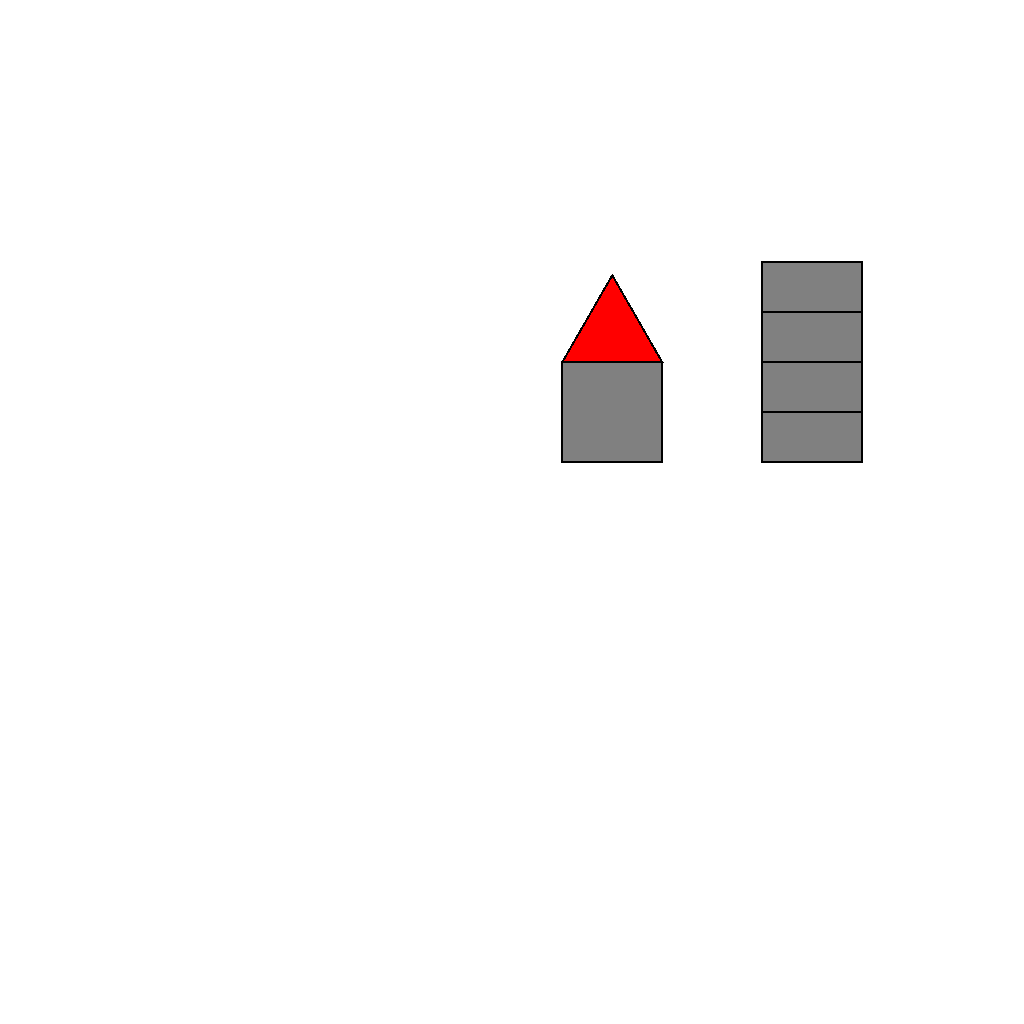

In [93]:
class City {
    
    //
    // Der Wichtigste Bauteil unserer Siluette ist ein Rechteck. Aus diesen bauen wir die 
    // Häuser und Häuserblöcke auf. Als Argument für die Prozedur nehmen wir die Position
    // an die wir zeichnen wollen, sowie die Breite und Höhe des Dreiecks. 
    //
    public static void drawRectangle(double x, double y, double width, double height, Color color) {
        penUp();
        goTo(x, y);
        penDown();
        penColor(BLACK);
        forward(height);
        turnRight(90);
        forward(width);
        turnRight(90);
        forward(height);
        turnRight(90);
        forward(width);

        // fill
        penUp();
        backward(width / 2);
        turnRight(90);
        forward(height / 2);
        
        penColor(color);
        fill();

    }    

    
    // Um Dächer unserer Häuser zeichnen zu können nutzen wir ein Dreieck. 
    // Am einfachsten ist es, ein gleichseitiges Dreieck zu zeichnen, welches durch 
    // die Position und die Seitenränder definiert ist. Wir zeichnen dies immer in 
    // Standartausrichtung (d.h. mit einer Seite parallel zur x-Achse)
    public static void drawTriangle(double x, double y, double length, Color color) {
        penUp();
        goTo(x, y);
        penDown();
        penColor(BLACK);
        turnRight(90);
        forward(length);
        turnLeft(120);
        forward(length);
        turnLeft(120);
        forward(length);
        turnLeft(120);
        forward(length);
        
        //fill
        penUp();
        penColor(color);
        turnLeft(150);
        forward(length / 2);
        penDown();
        fill();
        home();
      
    }

    
    // Um das Haus zu zeichnen nutzen wir ein Rechteck und ein Dreieck
    public static void drawHouse(int x, int y, double width, double height) {
        drawRectangle(x, y, width, height, GREY);
        drawTriangle(x, y + height, width, RED);
    }
 
    // Diese Prozedur zeichnet einen Wolkenkrayer an die durch x und y angegebene Position. 
    // Jeder Wolkenkrazer besteht wieder nur aus einzelnen Rechtecken
    public static void draw4StoriesSkyscraper(double x, double y, double width, double height) {
        
        drawRectangle(x, y, width, height / 4, GREY);
        drawRectangle(x, y + height / 4, width, height / 4, GREY);
        drawRectangle(x, y + 2 * height / 4, width, height / 4, GREY);
        drawRectangle(x, y + 3 * height / 4, width, height / 4, GREY);
    }
    
    public static void main(String[] args) {
        reset();
        clear();
        drawHouse(10, 10, 20, 20);
        draw4StoriesSkyscraper(50, 10, 20, 40);
        
        display(drawing());
    }
        
}
City.main(new String[0]);
          


##### Miniübung
- Schreiben sie eine Methode die einen Skyscraper mit 6 Stockwerken zeichnet
- Schreiben sie eine Methode die einen Skyscraper mit Antenne zeichnet
- Versuchen Sie obige Zeichnung zu reproduzieren. 